# Lecture #7: `matplotlib`

You may import `numpy` and `pandas` as usual first.

In [1]:
import numpy as np
import pandas as pd

It is common practice to import `matplotlib` as the following. And the special command in the last line make jupyter notebook present graphs within the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Simple example

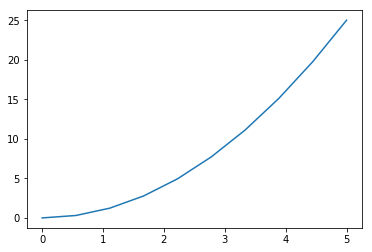

In [3]:
x = np.linspace(0, 5, 10)
plt.plot(x, x ** 2)

## Putting multiple plots in one graph

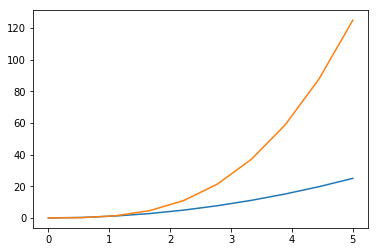

In [4]:
plt.figure() # initialization
plt.plot(x, x ** 2, x, x ** 3) # put multiple x and y pairs

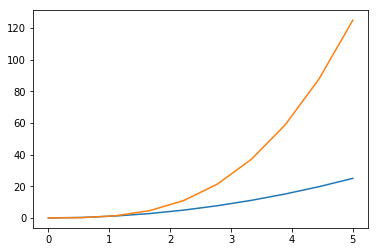

In [5]:
# or invoke plot() function repeatedly
plt.figure()
plt.plot(x, x ** 2)
plt.plot(x, x ** 3)

## Decorating graphs

###  Title, labels for x & y axis

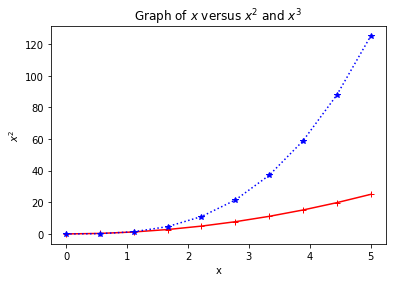

In [6]:
plt.figure() # initialization
plt.plot(x, x ** 2, 'r-+')
plt.plot(x, x ** 3, 'b:*')
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.title('Graph of $x$ versus $x^2$ and $x^3$')

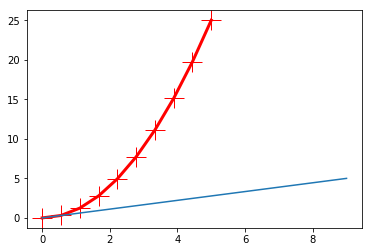

In [7]:
plt.figure()
plt.plot(x, x ** 2, color='red', linestyle = '-', linewidth=3.0,
         marker='+', markersize=20.0)
plt.plot(x, )

In [8]:
# check all the options
plt.plot?

### xlim, ylim

(-5, 15)

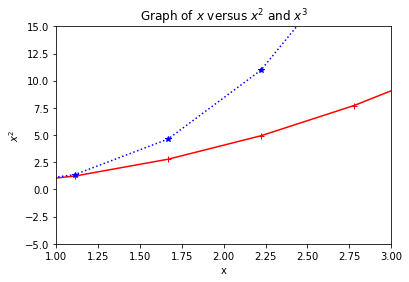

In [9]:
plt.figure() # initialization
plt.plot(x, x ** 2, 'r-+')
plt.plot(x, x ** 3, 'b:*')
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.title('Graph of $x$ versus $x^2$ and $x^3$')
plt.xlim(1, 3)
# or
#plt.xlim((1,3)) # list or tuple with 2 values
plt.ylim(-5, 15)

### Legends

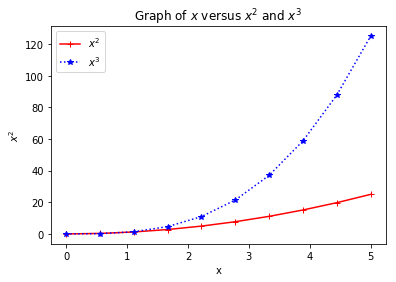

In [10]:
plt.figure() # initialization
plt.plot(x, x ** 2, 'r-+')
plt.plot(x, x ** 3, 'b:*')
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.title('Graph of $x$ versus $x^2$ and $x^3$')
plt.legend(['$x^2$', '$x^3$'], loc='upper left')

## Save graphs

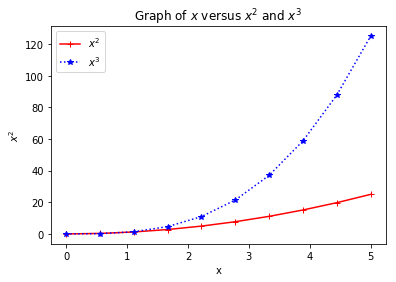

In [11]:
fig = plt.figure() # initialization
plt.plot(x, x ** 2, 'r-+')
plt.plot(x, x ** 3, 'b:*')
plt.xlabel('x')
plt.ylabel('$x^2$')
plt.title('Graph of $x$ versus $x^2$ and $x^3$')
plt.legend(['$x^2$', '$x^3$'], loc='upper left')
# you can use several file formats, e.g,. png, pdf, svg, eps
fig.savefig('graph.png')

## Subplots

Internal hierarchies of matplotlib classes.

![](http://matplotlib.org/1.4.3/_images/fig_map.png)

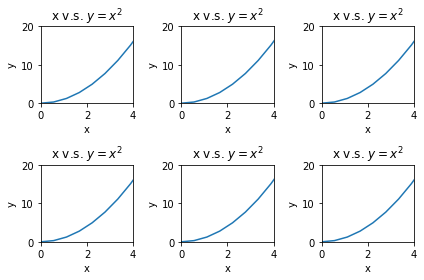

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3)

for row in range(2):
    for col in range(3):
        axe = axes[row][col]
        axe.plot(x, x**2)
        axe.set_xlabel('x') # NOT xlabel()
        axe.set_ylabel('y')
        axe.set_title('x v.s. $y=x^2$')
        axe.set_xlim((0, 4))
        axe.set_ylim((0, 20))
fig.tight_layout()

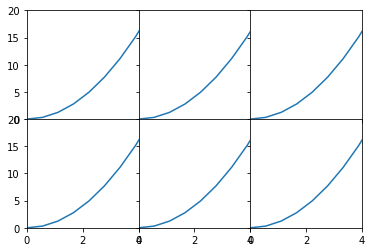

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for row in range(2):
    for col in range(3):
        ax = axes[row][col]
        ax.plot(x, x**2)
        ax.set_xlim((0, 4))
        ax.set_ylim((0, 20))
plt.subplots_adjust(wspace=0, hspace=0)

## Log scale

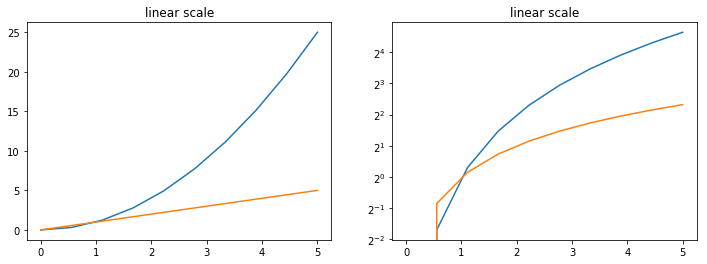

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, x ** 2, x, x)
axes[0].set_title('linear scale')

axes[1].plot(x, x ** 2, x, x)
axes[1].set_title('linear scale')
axes[1].set_yscale('log', basey=2)

## Other plot types

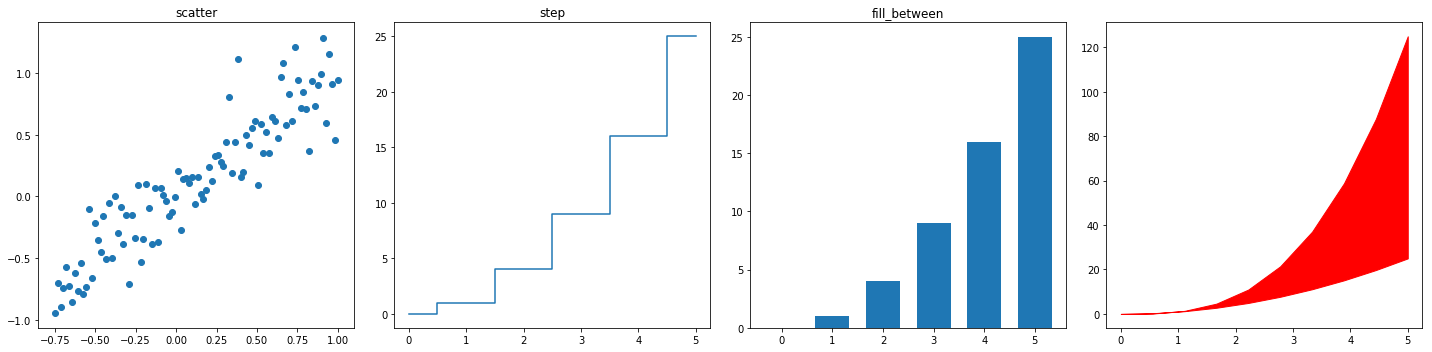

In [15]:
xx = np.linspace(-0.75, 1., 100)
n = np.array(range(6))

fig, axes = plt.subplots(1, 4, figsize=(20,5))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title('scatter')

axes[1].step(n, n**2, where='mid') # where can take: pre, post, mid
axes[1].set_title('step')

axes[2].bar(n, n**2, align='center', width=0.67)
axes[2].set_title('bar')

axes[3].fill_between(x, x**2, x**3, color='red')
axes[2].set_title('fill_between')

fig.tight_layout()

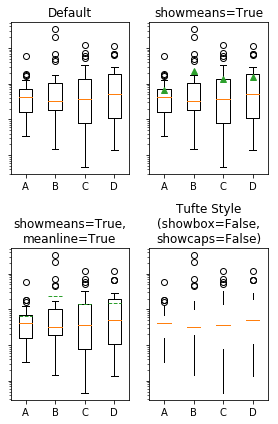

In [16]:
np.random.seed(42)
data = np.random.lognormal(size=(37,4), mean=1.5, sigma=1.75)
labels = list('ABCD')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,6))
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default')
axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True')
axes[1, 0].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[1, 0].set_title('showmeans=True,\nmeanline=True')
axes[1, 1].boxplot(data, labels=labels, showbox=False, showcaps=False)
axes[1, 1].set_title('Tufte Style\n(showbox=False,\nshowcaps=False)')

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])
    
fig.tight_layout()

In [17]:
plt.Axes.boxplot?

## Visualization in pandas

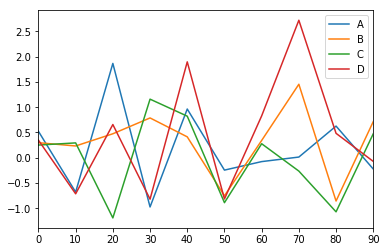

In [18]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'), index=np.arange(0, 100, 10))
df.plot()

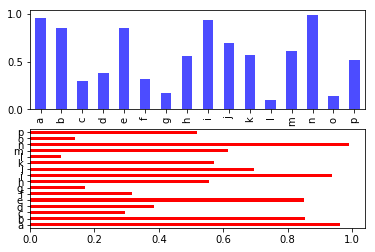

In [19]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='r')

Note: examples are taken from 'Python for data analysis', 'Doing data science' and coursera courses